# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [113]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [114]:
# Convert cities to dataframe
cities_df = pd.DataFrame(cities,columns=["City"])
# Add new columns "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", and "Wind Speed" to cities_df 
cities_df["Cloudiness"]=''
cities_df["Country"]=''
cities_df["Date"]=''
cities_df["Humidity"]=''
cities_df["Lat"]=''
cities_df["Lng"]=''
cities_df["Max Temp"]=''
cities_df["Wind Speed"]=''
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,praya,,,,,,,,
1,olafsvik,,,,,,,,
2,la libertad,,,,,,,,
3,rikitea,,,,,,,,
4,hobart,,,,,,,,


In [115]:
weather_data_list=[]
# Basic URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Loop through "cities,append json weather data in weather_data_list
for i in range(len(cities)):
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + cities[i] + "&units=imperial"
    response = requests.get(query_url)
    weather_data = response.json()
    weather_data_list.append(weather_data)

In [116]:
len(weather_data_list)

612

In [117]:
city_count = 1
set_count=1
iter_count=1

print("Beginning Data Retrieval")
print("-" *30)
for i in range(len(weather_data_list)):
    try: 
        weather_data_list[i]["name"] == cities_df.loc[i,"City"]
    except: 
        print("City not found. Skipping ...")
    else:
        # Print out the number and name of the city being processed
        print(f"Processing Record {city_count} of Set {set_count} | {cities[i]}")
        cities_df.loc[i, "Cloudiness"] =  weather_data_list[i]["clouds"]["all"]
        cities_df.loc[i, "Country"] =  weather_data_list[i]["sys"]["country"]
        cities_df.loc[i, "Date"] = weather_data_list[i]["dt"]         
        cities_df.loc[i, "Humidity"] = weather_data_list[i]["main"]["humidity"]
        cities_df.loc[i, "Lat"] = weather_data_list[i]["coord"]["lat"]
        cities_df.loc[i, "Lng"] = weather_data_list[i]["coord"]["lon"]
        cities_df.loc[i, "Max Temp"] =  weather_data_list[i]["main"]["temp_max"]
        cities_df.loc[i, "Wind Speed"] =  weather_data_list[i]["wind"]["speed"]
        city_count += 1
        iter_count += 1
        # If loop interation over 50 cycles...
        if iter_count == 51:
            city_count = 0
            set_count += 1
            iter_count = 1
        
 # Print out the following, indicating the completion of data retrieval
print("-" *30)
print("Data Retrieval Complete")
print("-" *30)
        

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | praya
City not found. Skipping ...
Processing Record 2 of Set 1 | la libertad
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | mareeba
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | ramachandrapuram
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | albany
City not found. Skipping ...
Processing Record 15 of Set 1 | talara
Processing Record 16 of Set 1 | esso
Processing Record 17 of Set 1 | aripuana
Processing Record 18 of Set 1 | tasiilaq
City not found. Skipping ...
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1

City not found. Skipping ...
Processing Record 31 of Set 4 | tysmenytsya
Processing Record 32 of Set 4 | mogadishu
Processing Record 33 of Set 4 | kenai
Processing Record 34 of Set 4 | kahului
Processing Record 35 of Set 4 | okha
Processing Record 36 of Set 4 | dawson creek
Processing Record 37 of Set 4 | katsuura
City not found. Skipping ...
Processing Record 38 of Set 4 | eureka
Processing Record 39 of Set 4 | bani
Processing Record 40 of Set 4 | clyde river
Processing Record 41 of Set 4 | onega
Processing Record 42 of Set 4 | cherskiy
City not found. Skipping ...
Processing Record 43 of Set 4 | port shepstone
Processing Record 44 of Set 4 | panjakent
Processing Record 45 of Set 4 | teya
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | merauke
Processing Record 48 of Set 4 | champerico
Processing Record 49 of Set 4 | maningrida
Processing Record 0 of Set 5 | kosino
Processing Record 1 of Set 5 | cheyenne
Processing Record 2 of Set 5 | treuchtlingen
Processing 

Processing Record 43 of Set 9 | salinas
Processing Record 44 of Set 9 | monrovia
Processing Record 45 of Set 9 | agua prieta
Processing Record 46 of Set 9 | chicama
Processing Record 47 of Set 9 | hamina
City not found. Skipping ...
Processing Record 48 of Set 9 | linxi
Processing Record 49 of Set 9 | lagoa
City not found. Skipping ...
Processing Record 0 of Set 10 | kavieng
Processing Record 1 of Set 10 | palestina
Processing Record 2 of Set 10 | cabedelo
Processing Record 3 of Set 10 | namibe
Processing Record 4 of Set 10 | lusambo
Processing Record 5 of Set 10 | maumere
Processing Record 6 of Set 10 | borogontsy
Processing Record 7 of Set 10 | barinitas
Processing Record 8 of Set 10 | nago
Processing Record 9 of Set 10 | pirovskoye
Processing Record 10 of Set 10 | tutoia
Processing Record 11 of Set 10 | ayorou
City not found. Skipping ...
Processing Record 12 of Set 10 | karsiyang
Processing Record 13 of Set 10 | kadhan
Processing Record 14 of Set 10 | daru
Processing Record 15 of S

In [118]:
# Drop rows contain null data 
cities_df=cities_df[cities_df['Cloudiness']!='']
print(f'We get {len(cities_df)} valid cities data from {len(cities)} cities.')

We get 542 valid cities data from 612 cities.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
# Preview "cities_df"
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,praya,40,ID,1554183000,59,-8.71,116.27,89.6,6.93
2,la libertad,0,PE,1554181200,71,-16.38,-71.56,53.6,3.36
3,rikitea,0,PF,1554183133,100,-23.12,-134.97,75.95,16.84
4,hobart,75,AU,1554182955,48,-42.88,147.33,66.99,11.41
5,mareeba,32,AU,1554182844,77,-16.99,145.42,80.01,3


In [129]:
# Save "cities_df" to csv file
cities_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [212]:
# import cities.csv as dataframe
cities_df= pd.read_csv('output_data/cities.csv')
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,praya,40,ID,1554183000,59,-8.71,116.27,89.60,6.93
1,la libertad,0,PE,1554181200,71,-16.38,-71.56,53.60,3.36
2,rikitea,0,PF,1554183133,100,-23.12,-134.97,75.95,16.84
3,hobart,75,AU,1554182955,48,-42.88,147.33,66.99,11.41
4,mareeba,32,AU,1554182844,77,-16.99,145.42,80.01,3.00


In [220]:
# Find the earliest and latest time the weather data recorded 
# Convert Epoch & Unix Timestamp to local readable date
# Resource https://www.epochconverter.com/
print(f"The earlieat date in our dataset is {cities_df['Date'].min()}(04/01/2019 23:00:00).")
print(f"The latest date in our dataset is {cities_df['Date'].max()}(04/02/2019 0:46:40).")
  

The earlieat date in our dataset is 1554177600(04/01/2019 23:00:00).
The latest date in our dataset is 1554183783(04/02/2019 0:46:40).


In [221]:
During = int((cities_df['Date'].max()-cities_df['Date'].min())/60)

print(f'All the weather data in our dataset recorded are within {During} mins')

All the weather data in our dataset recorded are within 103 mins


#### Latitude vs. Temperature Plot

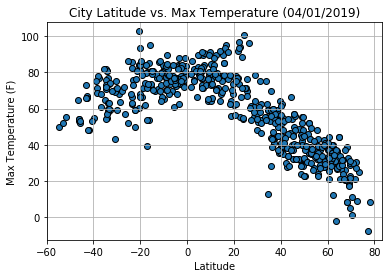

In [222]:
# Generate scatter plot on Latitude vs. Temperature
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_df["Lat"]) - 5, max(cities_df["Lat"]) + 5)
plt.ylim(min(cities_df["Max Temp"]) - 5, max(cities_df["Max Temp"]) + 5)

# Create title
plt.title(f"City Latitude vs. Max Temperature (04/01/2019)")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_temperature.png", dpi=300)

# Show figure
plt.show()

In [224]:
min_tem = cities_df["Max Temp"].min()
max_tem = cities_df["Max Temp"].max()
print(f'The highest temperature recorded is {max_tem}F, the lowest temperature recorded is {min_tem}F.')

The highest temperature recorded is 102.59F, the lowest temperature recorded is -7.39F.


In [231]:
# the data where the city got the highest temperature 
cities_df[cities_df["Max Temp"]==max_tem]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
241,karratha,0,AU,1554183722,22,-20.74,116.85,102.59,8.57


In [233]:
# the data where the city got the lowest temperature 
cities_df[cities_df["Max Temp"]==min_tem]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
130,qaanaaq,0,GL,1554183131,74,77.48,-69.36,-7.39,7.11


In [226]:
# the latitude region where Max Temp greater than 90F
cities_df[cities_df["Max Temp"]>90]['Lat'].describe()

count    16.000000
mean     10.686875
std      15.869648
min     -20.740000
25%       7.152500
50%      16.560000
75%      22.167500
max      26.580000
Name: Lat, dtype: float64

In [227]:
# the latitude region where Max Temp less than 10F
cities_df[cities_df["Max Temp"]<10]['Lat'].describe()

count     8.000000
mean     71.091250
std       4.887759
min      63.750000
25%      68.325000
50%      69.955000
75%      73.962500
max      78.220000
Name: Lat, dtype: float64

#### Latitude vs. Humidity Plot

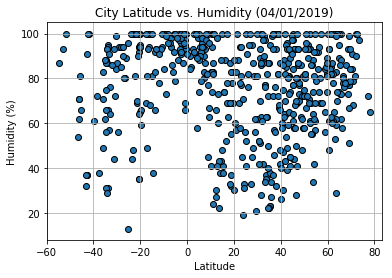

In [81]:
# Generate scatter plot on Latitude vs. Humidity
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_df["Lat"]) - 5, max(cities_df["Lat"]) + 5)
plt.ylim(min(cities_df["Humidity"]) - 5, max(cities_df["Humidity"]) + 5)

# Create title
plt.title(f"City Latitude vs. Humidity (04/01/2019)")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_humidity.png", dpi=300)

# Show figure
plt.show()

In [201]:
cities_df["Humidity"].describe()

count    542.000000
mean      74.780443
std       21.920748
min        9.000000
25%       62.000000
50%       80.000000
75%       93.000000
max      100.000000
Name: Humidity, dtype: float64

In [235]:
# The humidity in the region (latitude from -5 to 5 )
cities_df[(cities_df["Lat"]>-5) & (cities_df["Lat"]<5)]["Humidity"].describe()

count     41.000000
mean      90.780488
std       10.265262
min       62.000000
25%       86.000000
50%       94.000000
75%       99.000000
max      100.000000
Name: Humidity, dtype: float64

#### Latitude vs. Cloudiness Plot

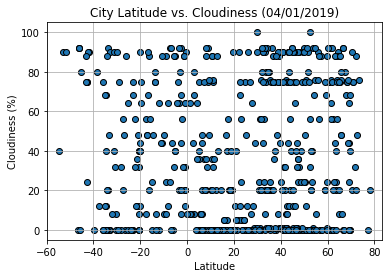

In [87]:
# Generate scatter plot on Latitude vs. Cloudiness
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_df["Lat"]) - 5, max(cities_df["Lat"]) + 5)
plt.ylim(min(cities_df["Cloudiness"]) - 5, max(cities_df["Cloudiness"]) + 5)

# Create title
plt.title(f"City Latitude vs. Cloudiness (04/01/2019)")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_cloudiness.png", dpi=300)

# Show figure
plt.show()

In [246]:
# We describe the cloud cover as four different types: Clear, Scattered, Broken, Overcast
bin_edges =[-1,10,50,90,100]
bin_names = ["Clear", "Scattered", "Broken", "Overcast"]
cities_df['Cloud_level'] = pd.cut(cities_df["Cloudiness"], bin_edges, labels=bin_names)

# Count the cities in each cloud cover types
cities_df.groupby("Cloud_level")['City'].count()


Cloud_level
Clear        187
Scattered    163
Broken       146
Overcast      46
Name: City, dtype: int64

#### Latitude vs. Wind Speed Plot

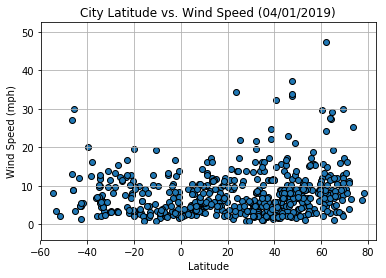

In [85]:
# Generate scatter plot on Latitude vs. Wind Speed
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", edgecolors="black")

# Set limits on x and y axes
plt.xlim(min(cities_df["Lat"]) - 5, max(cities_df["Lat"]) + 5)
plt.ylim(min(cities_df["Wind Speed"]) - 5, max(cities_df["Wind Speed"]) + 5)

# Create title
plt.title(f"City Latitude vs. Wind Speed (04/01/2019)")

# Create labels for x and y axes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Create grid
plt.grid()

# Save figure
plt.savefig("output_data/lat_vs_wind_speed.png", dpi=300)

# Show figure
plt.show()

### DESCRIPTION OF OBSERVATIONS


For this project, we pull weather data by using OpenWeather API for 542 random cities , then we explore the corelation of latitide and other weather elements(wind speed, max temperature, Humidity, Cloudiness). All the datas collected within 103 mins(from 04/01/2019 23:00:00 to 04/02/2019 0:46:40)

1.latitide  vs max temperature 

We can see that cities on the region(latitude from -20.7 to 26.5)experience the highest temperatures(tem> 90F).The highest temperature on 4/1/2019 midnight is 102.59F, located on latitude -20.74. The temperature of the cities located far away this region decreased graudally from two sides. The city with lowest temperature (tem<10F) is located the region (latitude from 68.3 to 78.2). The lowest temperature we recorded is -7.39F, located on latitude 77.48. 


2.latitide vs Humidity 

Percent humidity doesn't seem to have much correlation to latitude. 75% latitudes have humidity percentage ranging from 62% to 100%. The cities on or very near the equator(latitude from -5 to 5) have higher humidity (from 62% t0 100% )

3.latitide  vs Cloudiness
No significant correlation was found between latitude and cloud cover. We describe the cloud cover as four different types: Clear(0-10%), Scattered(10-50%), Broken(50-90%), Overcast(90-100%). Among 542 cities, there are 187 cities's skies are clear,
163 cities' cloud coverages are scattered.

